In [ ]:
import sys
sys.path.append('/network/lustre/iss02/aramis/users/rosana.eljurdi/LymphSeg')
sys.path.append('/network/lustre/iss02/aramis/users/rosana.eljurdi/LymphSeg/Training')
import networks
import torch
from ptflops import get_model_complexity_info

import tensorflow as tf

from monai.networks.nets import UNet

# 3 layer network with down/upsampling by a factor of 2 at each layer with 2-convolution residual units
model = UNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    channels=(4, 8, 16),
    strides=(2, 2),
    num_res_units=2
)


#macs, params = get_model_complexity_info(net, (1,96, 96, 96), as_strings=True,
#                                       print_per_layer_stat=True, verbose=True)
#print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
#print('{:<30}  {:<8}'.format('Number of parameters: ', params))





tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

iris = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
iris.head()


X = torch.tensor(iris.drop("variety", axis=1).values, dtype=torch.float)
y = torch.tensor(
    [0 if vty == "Setosa" else 1 if vty == "Versicolor" else 2 for vty in iris["variety"]], 
    dtype=torch.long
)

print(X[:3])
print()
print(y[:3])

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000]])

tensor([0, 0, 0])


In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(in_features=4, out_features=16)
        self.hidden_1 = nn.Linear(in_features=16, out_features=16)
        self.output = nn.Linear(in_features=16, out_features=3)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_1(x))
        return self.output(x)
    
    
model = Net()
print(model)

Net(
  (input): Linear(in_features=4, out_features=16, bias=True)
  (hidden_1): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
)


In [6]:
from torchviz import make_dot




model = Net()
y = model(X)

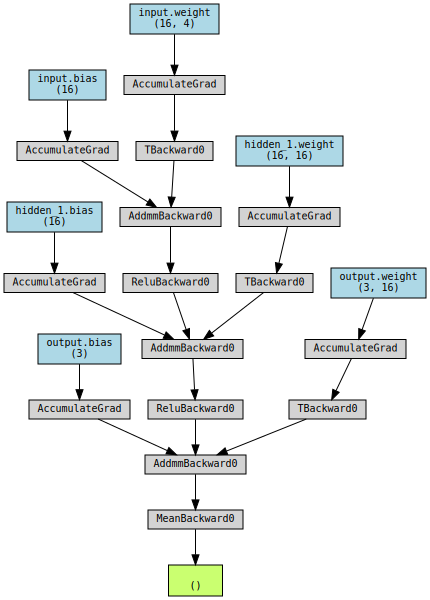

In [8]:
make_dot(y.mean(), params=dict(model.named_parameters()))
